In [9]:
import IPython, graphviz, re
from io import StringIO
from IPython.display import Image
import numpy as np
import pandas as pd
import math
from sklearn import tree
from sklearn.datasets import load_boston, load_iris
from collections import defaultdict
import string
import re
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# inspired by Mark Needham's blog
# https://markhneedham.com/blog/2017/09/23/python-3-create-sparklines-using-matplotlib/

#def sparkline(data, filename, fill=False, figsize=(4, 0.25), **kwags):
"""
Save a sparkline image
"""

boston = load_boston()

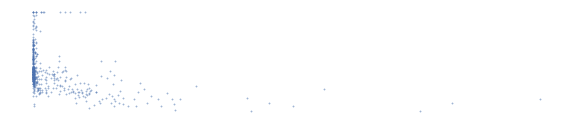

In [11]:
data = boston.data
feature_names = boston.feature_names
target = boston.target

fig, ax = plt.subplots(1, 1, figsize=(10,2))
ax.scatter(data[:,0], target, s=2, alpha=.5)
# ax.scatter(data[:,1], target, s=2)
# ax.scatter(data[:,2], target, s=2)
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

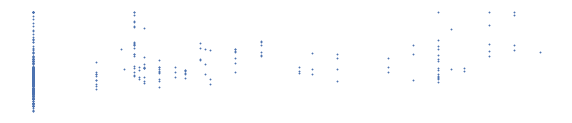

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10,2))
ax.scatter(data[:,1], target, s=2)
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

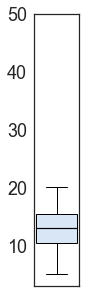

In [13]:
y = np.array([16.2, 18., 14.3, 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14., 14.4, 13.4, 15.6
, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 19.4, 17., 15.6, 13.1, 17.8, 16.8, 13.8, 13.8
, 13.9, 13.3, 13.1, 10.2, 10.9, 11.3, 12.3, 8.8, 7.2, 10.5, 7.4, 10.2, 11.5, 15.1
, 23.2, 9.7, 13.8, 12.7, 13.1, 12.5, 8.5, 5., 6.3, 5.6, 7.2, 12.1, 8.3, 8.5
, 5., 11.9, 7., 7.2, 7.5, 10.4, 8.8, 8.4, 16.7, 14.2, 13.4, 8.3, 10.9, 11.
, 9.5, 14.3, 11.7, 13.4, 9.6, 8.7, 8.4, 12.8, 10.5, 17.1, 18.4, 15.4, 10.8, 11.8
, 14.9, 12.6, 14.1, 13., 13.4, 15.2, 16.1, 14.9, 14.1, 12.7, 13.5, 14.9, 20., 16.4
, 17.7, 19., 16.7, 12., 14.6, 15.2, 7., 8.1, 13.6])

fig, ax = plt.subplots(1, 1, figsize=(.8,5))
ax.xaxis.set_visible(False)
ax.set_xticks([])
#ax.set_xlim(0,.2)

y_range = (3,50)
ax.set_ylim(y_range)
ax.tick_params(axis='both', which='major', labelsize=18)
meanprops = {'linewidth':1.2,'linestyle':'-','color':'black'}
bp =ax.boxplot(y, notch=False, medianprops={'linewidth':0}, meanprops=meanprops,
           widths=[.9], showmeans=True, meanline=True, sym='', patch_artist=True)
BLUE = "#D9E6F5"
YELLOW = "#fefecd"
for patch in bp['boxes']:
    patch.set(facecolor=BLUE)       
plt.show()

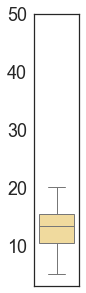

In [14]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(.8,5))
sns.set(style="white")
ax.set_ylim(3,50)
#ax.set_ylim('', fontsize=28, fontname="Arial)
#plt.xticks(fontsize=38)
plt.tick_params(axis='both', which='major', labelsize=18)
ax = sns.boxplot(y=y, color='#fee090', ax=ax, linewidth=1, sym='')

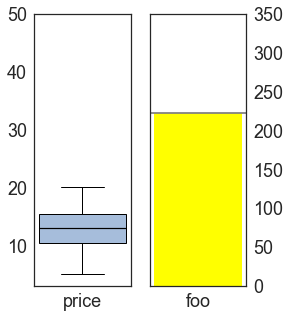

In [104]:
y = np.array([16.2, 18., 14.3, 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14., 14.4, 13.4, 15.6
, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 19.4, 17., 15.6, 13.1, 17.8, 16.8, 13.8, 13.8
, 13.9, 13.3, 13.1, 10.2, 10.9, 11.3, 12.3, 8.8, 7.2, 10.5, 7.4, 10.2, 11.5, 15.1
, 23.2, 9.7, 13.8, 12.7, 13.1, 12.5, 8.5, 5., 6.3, 5.6, 7.2, 12.1, 8.3, 8.5
, 5., 11.9, 7., 7.2, 7.5, 10.4, 8.8, 8.4, 16.7, 14.2, 13.4, 8.3, 10.9, 11.
, 9.5, 14.3, 11.7, 13.4, 9.6, 8.7, 8.4, 12.8, 10.5, 17.1, 18.4, 15.4, 10.8, 11.8
, 14.9, 12.6, 14.1, 13., 13.4, 15.2, 16.1, 14.9, 14.1, 12.7, 13.5, 14.9, 20., 16.4
, 17.7, 19., 16.7, 12., 14.6, 15.2, 7., 8.1, 13.6])

fig, axes = plt.subplots(1, 2, figsize=(3.8,5))
plt.subplots_adjust(wspace=.2)
ax0 = axes[0]
#ax0.xaxis.set_visible(False)
#ax0.set_xlabel("price", fontsize=18)
ax0.set_xticklabels(['ss','abc'])
#ax0.set_xticks([3], minor=True)

y_range = (3,50)
ax0.set_ylim(y_range)
ax0.tick_params(axis='both', which='major', labelsize=18)
meanprops = {'linewidth':1.2,'linestyle':'-','color':'black'}
bp =ax0.boxplot(y, notch=False,
                medianprops={'linewidth':0}, 
                meanprops=meanprops,
                widths=[.9],
                showmeans=True,
                meanline=True,
                sym='',
                labels=["price"],
                patch_artist=True)

BLUE = "#D9E6F5"
YELLOW = "#fefecd"
for patch in bp['boxes']:
    patch.set(facecolor='#a6bddb')       
    
ax1 = axes[1]
#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(['foo'])
# ax1.set_xticklabels(['ff'], minor=False)
#ax1.set_xlabel("n", fontsize=18)
ax1.yaxis.tick_right()
ax1.set_ylim(0,350)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.bar(0,223,color='yellow',tick_label='foo', linewidth=0)
ax1.axhline(223, color="grey")
plt.show()

In [91]:
??ax1.bar
